# Imports

In [2]:
import ctypes
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../Lib/PythonML')
from linear import Linear


In [3]:
#my_dll_path = "../mllib_rust.dll"
my_dll_path = "../Lib/SupervisingML/target/debug/libmllib_rust.so"

Fonctions 

In [4]:
def get_output(listy, positive_value, negative_value):
    result = []
    for y in listy:
        if y == positive_value:
            result.append(1)
        elif y == negative_value:
            result.append(-1)
    return result

def get_prediction_classification_echantillon(model, min_value, max_value):
    test_points = np.array([[i, j] for i in range(50) for j in range(50)], dtype='float64') / 50.0 * (max_value - min_value) + min_value
    test_points_predicted = np.zeros(len(test_points))
    negative_points = []
    positive_points = []
    for k, test_input_k in enumerate(test_points):
        predicted_value = model.predict_linear_model_classification(test_input_k)
        if predicted_value == 1.0:
            positive_points.append(test_input_k)
        else:
            negative_points.append(test_input_k)
            
    return (np.array(positive_points), np.array(negative_points))

# Cas de tests, rendu 3

## Classification

### Linear Simple :
        Linear Model : OK
        MLP (2, 1)   : OK

In [93]:
X = np.array([
      [1, 1],
      [2, 3],
      [3, 3]
], dtype='float64')
Y = np.array([
      1,
      -1,
      -1
], dtype='float64')
flattened_X = X.flatten()

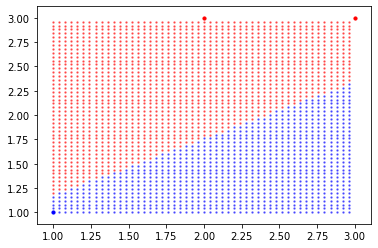

<Figure size 432x288 with 0 Axes>

In [95]:
linearMod = Linear(my_dll_path)
linearMod.init_linear_model(X.shape[1])
linearMod.train_linear_model_classification(flattened_X, Y, X.shape[0], 10000, 0.05)
blue_points, red_points = get_prediction_classification_echantillon(linearMod, 1.0, 3.0)

if len(red_points) > 0:
    plt.scatter(red_points[:, 0], red_points[:, 1], color='red', alpha=0.5, s=2)
if len(blue_points) > 0:
    plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', alpha=0.5, s=2)
    
plt.scatter(X[0, 0], X[0, 1], color='blue', s=10)
plt.scatter(X[1:3, 0], X[1:3, 1], color='red', s=10)
plt.show()
plt.clf()

### Linear Multiple :
        Linear Model : OK
        MLP (2, 1)   : OK

In [59]:
X = np.concatenate([np.random.random((50,2)) * 0.9 + np.array([1, 1]), np.random.random((50,2)) * 0.9 + np.array([2, 2])])
Y = np.concatenate([np.ones((25, 2)), np.ones((25, 2)) * -1.0])

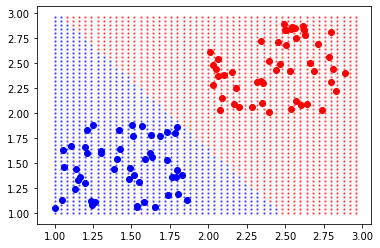

<Figure size 432x288 with 0 Axes>

In [62]:
linearMod = Linear(my_dll_path)
linearMod.init_linear_model(2)
flattened_X = X.flatten()

linearMod.train_linear_model_classification(flattened_X, Y, X.shape[0], 1000, 0.1)
blue_points, red_points = get_prediction_classification_echantillon(linearMod, 1.0, 3.0)

if len(red_points) > 0:
    plt.scatter(red_points[:, 0], red_points[:, 1], color='red', alpha=0.5, s=2)
if len(blue_points) > 0:
    plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', alpha=0.5, s=2)
    
plt.scatter(X[0:50, 0], X[0:50, 1], color='blue')
plt.scatter(X[50:100,0], X[50:100,1], color='red')
plt.show()
plt.clf()

### XOR :
        Linear Model    : KO
        MLP (2, 2, 1)   : OK

In [65]:
X = np.array([[1, 0], [0, 1], [0, 0], [1, 1]], dtype='float64')
Y = np.array([1, 1, -1, -1], dtype='float64')

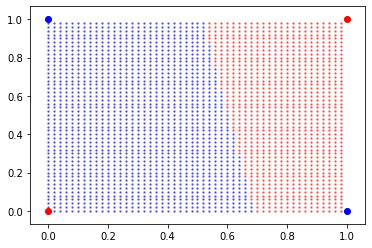

<Figure size 432x288 with 0 Axes>

In [70]:
linearMod = Linear(my_dll_path)
linearMod.init_linear_model(2)
flattened_X = X.flatten()
linearMod.train_linear_model_classification(flattened_X, Y, X.shape[0], 1000, 0.1)
blue_points, red_points = get_prediction_classification_echantillon(linearMod, 0.0, 1.0)

if len(red_points) > 0:
    plt.scatter(red_points[:, 0], red_points[:, 1], color='red', alpha=0.5, s=2)
if len(blue_points) > 0:
    plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', alpha=0.5, s=2)

plt.scatter(X[0:2, 0], X[0:2, 1], color='blue')
plt.scatter(X[2:4,0], X[2:4,1], color='red')
plt.show()
plt.clf()

### Cross :
        Linear Model    : KO
        MLP (2, 4, 1)   : OK

In [83]:
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([1 if abs(p[0]) <= 0.3 or abs(p[1]) <= 0.3 else -1 for p in X], dtype='float64')

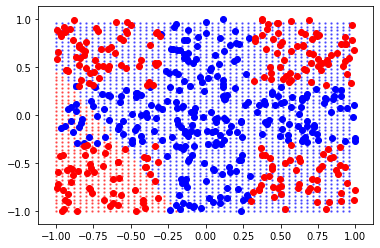

<Figure size 432x288 with 0 Axes>

In [87]:
linearMod = Linear(my_dll_path)
linearMod.init_linear_model(2)
flattened_X = X.flatten()
linearMod.train_linear_model_classification(flattened_X, Y, X.shape[0], 1000, 0.1)
blue_points, red_points = get_prediction_classification_echantillon(linearMod, -1.0, 1.0)

if len(red_points) > 0:
    plt.scatter(red_points[:, 0], red_points[:, 1], color='red', alpha=0.5, s=2)
if len(blue_points) > 0:
    plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', alpha=0.5, s=2)


plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,1], color='red')
plt.show()
plt.clf()

### Multi Linear 3 classes :
        Linear Model x3 : OK
        MLP (2, 3)      : OK

In [89]:
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([[1, 0, 0] if -p[0] - p[1] - 0.5 > 0 and p[1] < 0 and p[0] - p[1] - 0.5 < 0 else 
              [0, 1, 0] if -p[0] - p[1] - 0.5 < 0 and p[1] > 0 and p[0] - p[1] - 0.5 < 0 else 
              [0, 0, 1] if -p[0] - p[1] - 0.5 < 0 and p[1] < 0 and p[0] - p[1] - 0.5 > 0 else 
              [0, 0, 0]for p in X])

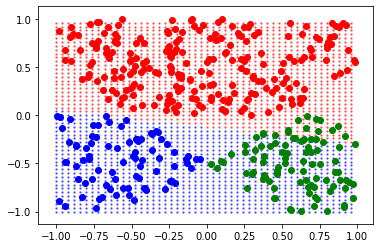

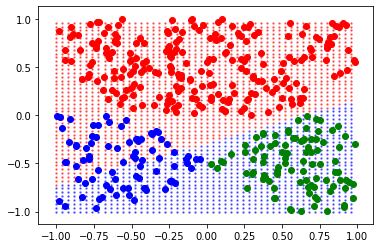

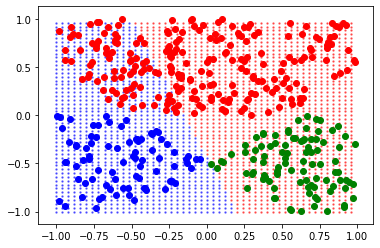

<Figure size 432x288 with 0 Axes>

In [90]:
comparaisons = [
    [[1,0,0], [0,1,0]],
    [[0,0,1], [0,1,0]],
    [[1,0,0], [0,0,1]]
]

for comparaison in comparaisons:
    input_x = np.array([X[i] for (i,y) in enumerate(Y.tolist()) if y in comparaison], dtype='float64')
    output_y = np.array(get_output(Y.tolist(), comparaison[0], comparaison[1]), dtype='float64')
    flattened_input = input_x.flatten()
   
    model = Linear(my_dll_path)
    model.init_linear_model(2)
    model.train_linear_model_classification(flattened_input, output_y, output_y.shape[0], 10000, 0.1)
    blue_points, red_points = get_prediction_classification_echantillon(model, -1.0, 1.0)
    
    if len(red_points) > 0:
        plt.scatter(red_points[:, 0], red_points[:, 1], color='red', alpha=0.5, s=2)
    if len(blue_points) > 0:
        plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', alpha=0.5, s=2)

    plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
    plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
    plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
    plt.show()
    plt.clf()

### Multi Cross :
        Linear Model x3 : KO
        MLP (2, ?, ?, 3): OK

In [91]:
X = np.random.random((1000, 2)) * 2.0 - 1.0
Y = np.array([[1, 0, 0] if abs(p[0] % 0.5) <= 0.25 and abs(p[1] % 0.5) > 0.25 else [0, 1, 0] if abs(p[0] % 0.5) > 0.25 and abs(p[1] % 0.5) <= 0.25 else [0, 0, 1] for p in X])

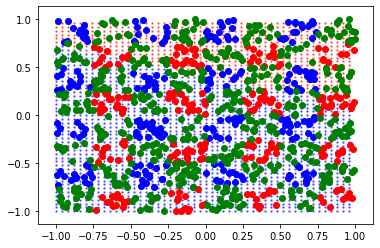

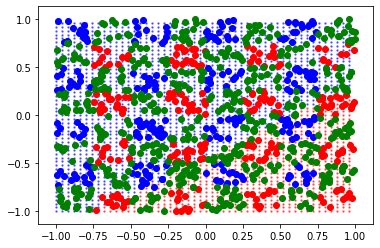

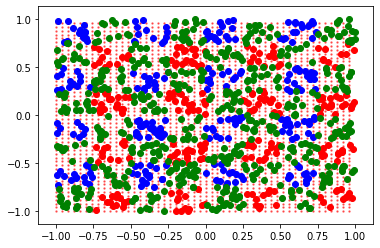

<Figure size 432x288 with 0 Axes>

In [92]:
comparaisons = [
    [[1,0,0], [0,1,0]],
    [[0,0,1], [0,1,0]],
    [[1,0,0], [0,0,1]]
]

for comparaison in comparaisons:
    input_x = np.array([X[i] for (i,y) in enumerate(Y.tolist()) if y in comparaison], dtype='float64')
    output_y = np.array(get_output(Y.tolist(), comparaison[0], comparaison[1]), dtype='float64')
    flattened_input = input_x.flatten()

    model = Linear(my_dll_path)
    model.init_linear_model(2)
    model.train_linear_model_classification(flattened_input, output_y, output_y.shape[0], 10000, 0.1)
    blue_points, red_points = get_prediction_classification_echantillon(model, -1.0, 1.0)
    
    if len(red_points) > 0:
        plt.scatter(red_points[:, 0], red_points[:, 1], color='red', alpha=0.5, s=2)
    if len(blue_points) > 0:
        plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', alpha=0.5, s=2)

    plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
    plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
    plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
    plt.show()
    plt.clf()

## Régression

### Linear Simple 2D :
        Linear Model : OK
        MLP (1, 1)   : OK

In [6]:
X = np.array([
      [1],
      [2]
], dtype='float64')
newX = np.array([
      [1,1],
      [1,2]
], dtype='float64')
Y = np.array([
      2,
      3
], dtype='float64')

[1.0, 1.0]


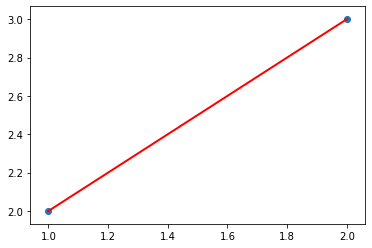

<Figure size 432x288 with 0 Axes>

In [15]:
flattened_X = newX.flatten()

model = Linear(my_dll_path)
equation_ptr = model.train_linear_model_regression(flattened_X, Y, newX.shape[0] * newX.shape[1])
equation = [equation_ptr[i] for i in range(2)]
print(equation)

plt.plot([1.0, 2.0], [2.0,3.0], 'r-', lw=2) # Red straight line
plt.scatter(X,Y)
plt.show()
plt.clf()

### Non Linear Simple 2D :
        Linear Model    : OK
        MLP (1, ?, 1)   : OK

In [5]:
X = np.array([
      [1],
      [2],
      [3]
])
Y = np.array([
      2,
      3,
      2.5
])

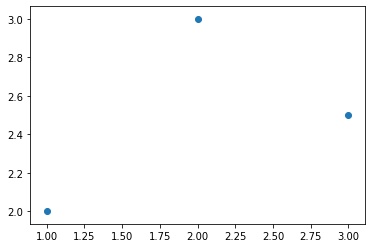

<Figure size 432x288 with 0 Axes>

In [25]:
plt.scatter(X,Y)
plt.show()
plt.clf()

### Linear Simple 3D :
        Linear Model    : OK
        MLP (2, 1)      : OK

In [26]:
X = np.array([
      [1, 1],
      [2, 2],
      [3, 1]
])
Y = np.array([
      2,
      3,
      2.5
])

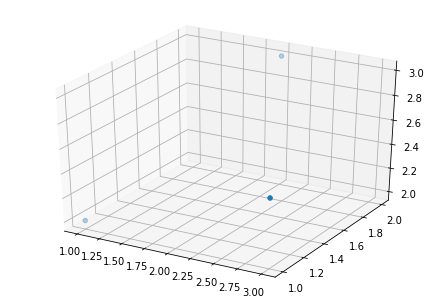

<Figure size 432x288 with 0 Axes>

In [27]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()

### Linear Tricky 3D :
        Linear Model    : OK
        MLP (2, 1)      : OK

In [28]:
X = np.array([
      [1, 1],
      [2, 2],
      [3, 3]
])
Y = np.array([
      1,
      2,
      3
])

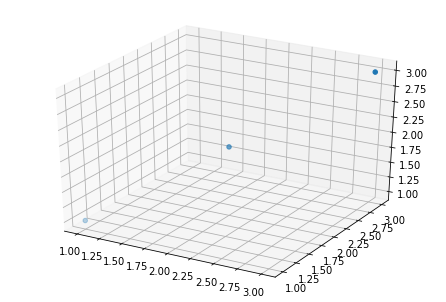

<Figure size 432x288 with 0 Axes>

In [29]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()

### Non Linear Simple 3D :
        Linear Model       : KO
        MLP (2, 2, 1)      : OK

In [30]:
X = np.array([
      [1, 0],
      [0, 1],
      [1, 1],
      [0, 0],
])
Y = np.array([
      2,
      1,
      -2,
      -1
])

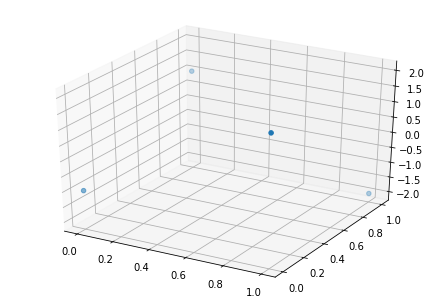

<Figure size 432x288 with 0 Axes>

In [31]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()